# The model uses machine learning to predict stock price based on historical price.

--- The Dataset contains NETFLIX stock price for  5 years from 5th Feb 2018 to 5th Feb 2022

In [ ]:
!pip install plotly --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 43.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


In [1]:
# importing the dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from datetime import datetime
from itertools import cycle
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import init_notebook_mode
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

Reading the data to the workspace

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:

stock= pd.read_csv('gdrive/My Drive/stock_price_data.csv')
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/5/2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2/6/2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2/7/2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2/8/2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2/9/2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
...,...,...,...,...,...,...,...
1004,1/31/2022,401.970001,427.700012,398.200012,427.140015,427.140015,20047500
1005,2/1/2022,432.959991,458.480011,425.540009,457.130005,457.130005,22542300
1006,2/2/2022,448.250000,451.980011,426.480011,429.480011,429.480011,14346000
1007,2/3/2022,421.440002,429.260010,404.279999,405.600006,405.600006,9905200


In [4]:
# Getting the dimension of the data
stock.shape

(1009, 7)

In [5]:
# Changing the date format
def change_dates (date_string):
  return datetime.strptime(date_string,'%m/%d/%Y').strftime('%Y-%m-%d')

stock['Date']=stock['Date'].apply(change_dates)
stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [6]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [7]:
for column in  stock.columns:
    print(column, stock[column].nunique())

Date 1009
Open 976
High 983
Low 989
Close 988
Adj Close 988
Volume 1005


In [8]:
#checking  for null valuee
stock.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [9]:
# Check for duplicates 
stock.duplicated().sum()

0

Getting summary statistics

In [10]:
stock.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


Exploratory Data analysis

In [11]:
stock['Date'] = pd.to_datetime( stock['Date'], format='%Y-%m-%d')

stock2 =  stock.loc[( stock['Date'] >= '2018-02-05')
                     & ( stock['Date'] < '2022-02-04')]

stock2= stock2.drop(stock[['Adj Close','Volume']],axis=1)
stock2.head()


,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001


In [12]:
#Creating monthwise dataframe of open and close values
monthwise= stock2.groupby(stock2['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthwise = monthwise.reindex(new_order, axis=0)
monthwise

,Open,Close
Date,,
January,417.425679,416.347902
February,391.382986,392.333897
March,388.095978,387.755173
April,402.571191,402.764880
May,402.188808,402.403333
June,422.624591,422.703059
July,439.405232,439.735000
August,417.242157,418.226703
September,436.613210,436.326172


In [13]:
#Plotting the monthwise comparism of open and close price
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Open'],
    name='Stock Open Price',
    marker_color='crimson'
))
fig.add_trace(go.Bar(
    x=monthwise.index,
    y=monthwise['Close'],
    name='Stock Close Price',
    marker_color='lightsalmon'
))

fig.update_layout(barmode='group', xaxis_tickangle=-90, 
                  title='Monthwise comparision between Stock open and close price')
fig.show()


We can see from the plots above that open stock and closing stock are almost the same in all the months. While July presents the highest open and close ctock price, the lowest occcurs in march

In [14]:
#Plotting the stock analysis chart
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(stock2, x=stock2.Date, y=[stock2['Open'], stock2['Close'], 
                                          stock2['High'], stock2['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

The stock analysis shows a consistent rise from September 2019 to around December 2021

Let us find the correlation between close and adjusted close 

In [15]:
# set date to index
df= stock2.set_index('Date')

In [16]:
# split data for prediciting january 2022
train = df.loc['2018-02-05':'2021-12-31']
test = df.loc['2022-01-01':'2022-01-31']

In [17]:
# split training data
X_train = train.drop(columns = ['Open'])
y_train = train['Open']
# split testing data
X_test = test.drop(columns = ['Open'])
y_test = test['Open']

In [18]:
X_train.head()

,High,Low,Close
Date,,,
2018-02-05,267.899994,250.029999,254.259995
2018-02-06,266.700012,245.000000,265.720001
2018-02-07,272.450012,264.329987,264.559998
2018-02-08,267.619995,250.000000,250.100006
2018-02-09,255.800003,236.110001,249.470001


##Building the model

In [19]:

model = RandomForestRegressor(max_depth=20, random_state = 42,  n_estimators=150)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=150, random_state=42)

#Model Evaluation

In [20]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print('train_score: test_score {},{}'.format(train_score,test_score))

train_score: test_score 0.9996851316404253,0.9919640067534171


In [21]:
y_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [22]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 52.367
RMSE 7.237
MAE 5.651
MAPE 0.012
R2 Score :  0.992


In [23]:
#predicting from unseen data
prediction_df = X_test.copy()
prediction_df['Open'] = y_test
prediction_df['Predicted Price'] = y_pred
prediction_df.head()

,High,Low,Close,Open,Predicted Price
Date,,,,,
2022-01-03,609.989990,590.559998,597.369995,605.609985,593.488071
2022-01-04,600.409973,581.599976,591.150024,599.909973,591.398664
2022-01-05,592.840027,566.880005,567.520020,592.000000,582.689055
2022-01-06,563.359985,542.010010,553.289978,554.340027,548.264127
2022-01-07,553.429993,538.219971,541.059998,549.460022,546.903798


#Plotting The Result

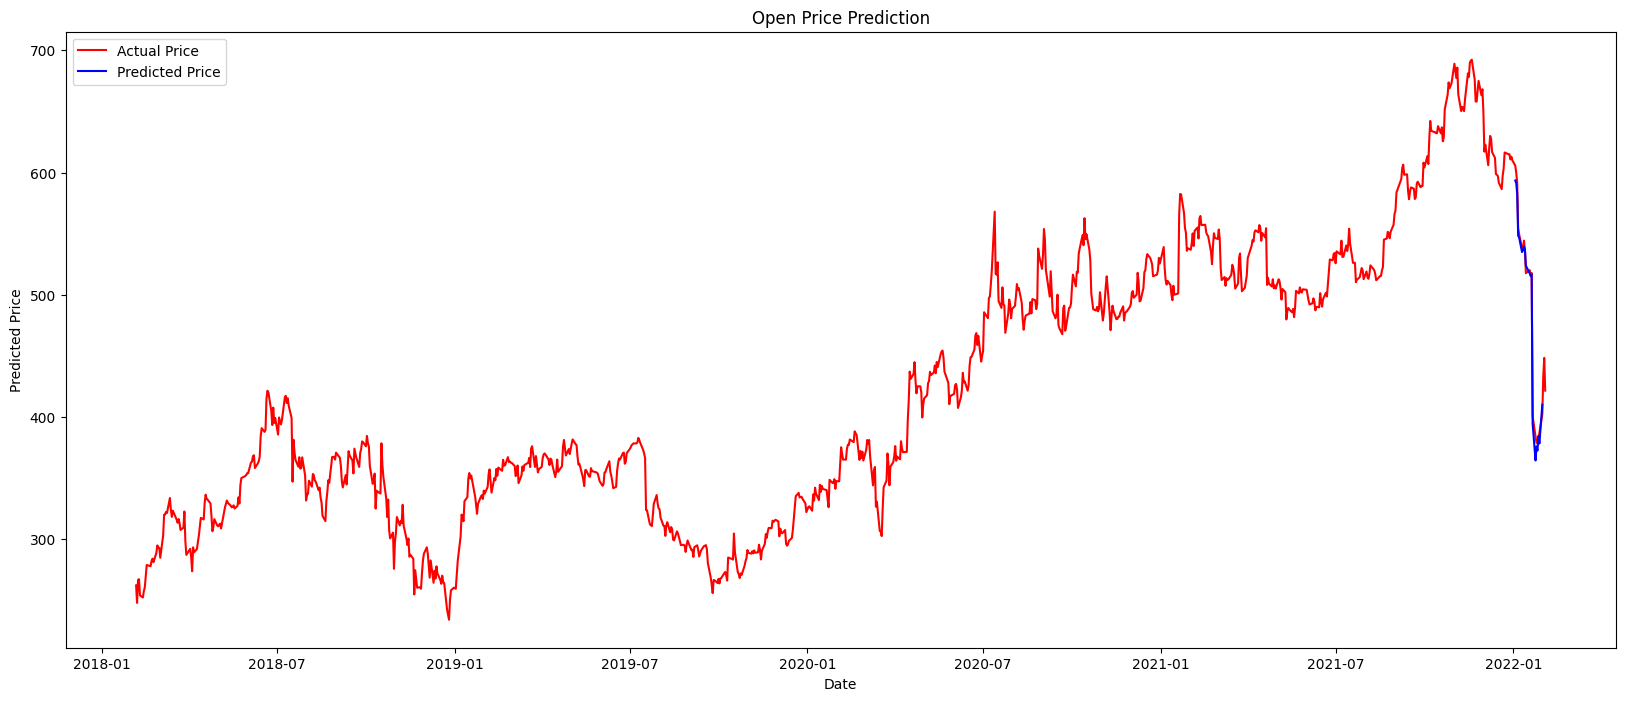

In [24]:
plt.subplots(figsize=(20, 8))
plt.title("Open Price Prediction")
plt.plot(df['Open'], color='red', linestyle='solid', label = 'Actual Price')
plt.plot(prediction_df['Predicted Price'], color='blue', linestyle='solid', label = 'Predicted Price')
plt.xlabel("Date")
plt.ylabel("Predicted Price")
plt.legend(loc="upper left")
plt.show()

# Analysis Of Result

1. The predicted price is in tandem with the actual price 
2. There was a sharp gain in stock price at the middle of 2021.This might be due to increase in streaming activities or buyesr seeing the stock as a valued stock
3. The sharp decline in price at the end of 2021  could be caused by a lot of factors .One of it might be too many sellers as a result of major policy change by the company or a major shareholder announcing a decision to sell his stock..

--------Solution to prevent continous slide in price 
 The company should grow revenue through acquiring more custumers

##saving the model as a pickle file

In [25]:
import pickle 
pickle.dump(model,open('model2.pkl','wb'))
